### CLASE 2

####1. Stochastic Gradient Descent para encontrar el máximo de una función

  a. Implementar en Python un algoritmo basado en Stochastic Gradient Descent para encontrar numéricamente el mínimo de 𝑦 = − (𝑥 − 2)^2 + 3. ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? ¿En qué momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiper parámetros del algoritmo?

In [1]:
import numpy as np
import torch
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib import animation, rc

rng = default_rng(1234)

In [2]:
x = np.linspace(-2, 6, 1000)
count = 0
xanim = []
yanim = []

def f(x):
  return - (x - 2)**2 + 3


def df(x):
  return - 2 * (x - 2)


# Hiperparámetros
lr = 0.075
x0 = np.random.choice(x)
print ("Comienzo la búsqueda del máximo con x0 =", x0, "y con un lr =", lr)


Comienzo la búsqueda del máximo con x0 = -0.5025025025025025 y con un lr = 0.075


In [3]:
# SGD (criterio de corte cuando el valor absoluto de la pendiente es menor a 0.01)

while abs(df(x0)) > 0.01:
  x0 = x0 + lr * df(x0)
  y = f(x0)
  xanim.append(x0)
  yanim.append(y)
  count = count + 1

print ("El valor máximo de la función es",y , "y el valor x es", x0)


El valor máximo de la función es 2.999980437459833 y el valor x es 1.99557704395604


In [4]:
# Hago una animación para ver como se busca el máximo de la función

rc('animation', html = 'html5')

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, autoscale_on = False)

def plot(i, axes=[-2, 6, -2, 6]):
  ax.clear()
  ax.plot(x, f(x))
  ax.scatter(xanim[i], yanim[i], c = "r")
  ax.set_title(f"Counter: {i+1}", fontsize=14)
  ax.set_xlabel("x", fontsize=12)
  ax.set_ylabel("f(x)", fontsize=12)
  ax.text(4.5, 5, f"x = {round(xanim[i],3)}")
  ax.text(4.5, 4.5, f"y = {round(yanim[i],3)}")
  ax.axis(axes)
  return ax

anim = animation.FuncAnimation(fig, plot, frames = count, interval = 150)
plt.close()
anim

#### 2. Mini-Batch Gradient Descent para entrenar un modelo cuadrático

  a. Crear un dataset sintético con 10,000 muestras a partir de la siguiente 
 expresión (donde “x” es la feature que toma valores entre 0 y 4, e “y” es la 
 salida):
 
 $y = -(x-2)^{2}+3+{0.2}\cdot{sin(16x)}$

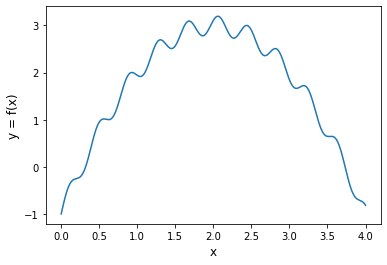

In [5]:
x = np.linspace(0, 4, 10000)
y = -(x - 2)** 2 + 3 + 0.2 * np.sin(16 * x)

plt.plot(x, y)
plt.xlabel("x", fontsize=12)
plt.ylabel("y = f(x)", fontsize=12)
plt.show()

  b. Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación. Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar la evolución del ECM con el número de epochs.

$\hat{𝑦} = w_{1} x^{2} + w_{2}x + w_{3}$

In [6]:
# Hiperparámetros
lr = 0.01

epochs = 100

In [7]:
# Permuto aleatoriamento los valores de x e y=f(x) y defino el tamaño del bartch
xy = np.column_stack((x, y))

batchsize = 500
xy_batch = rng.permutation(xy)
x_batch = xy_batch[:, 0].reshape(int(len(x)/batchsize),batchsize)
y_batch = xy_batch[:, 1].reshape(int(len(x)/batchsize),batchsize)

print("El tamaño de x_batch es:", x_batch.shape)
print("El tamaño de y_batch es:", y_batch.shape)


El tamaño de x_batch es: (20, 500)
El tamaño de y_batch es: (20, 500)


In [8]:
# Defino la función de salida, la loss y su derivada, y la actualización de los pesos W

def f(x, W):
  return W[0] * (x)**2 + W[1] * (x) + W[2]

def loss(y_hat, y):
  return np.mean((y - y_hat)**2)

def d_loss(y_hat, y):
  return -2 * (y - y_hat)

def update(W, dW, lr):
  return W - lr * np.mean(dW, axis = 1)


Se definen aleatoriamente los pesos W:

$\bar{W} = \left\{ \begin{array}{lcc}
                w_{0} \
             \\ w_{1} \
             \\ w_{2} \
              \end{array}
   \right.$

In [10]:
W = rng.standard_normal(3)

In [11]:
MSE = np.zeros(epochs)
for epoch in range(epochs):
  for batch in range(int(len(x)/batchsize)):
    y_hat = f(x_batch[batch,:], W)
    dy = d_loss(y_hat, y_batch[batch,:])
    dW = np.array([x_batch[batch, :]**2, x_batch[batch, :], np.ones(batchsize)])
    # Actualización de pesos W
    W = update(W, dW * dy, lr)
  MSE[epoch] = loss(f(x, W), y) 

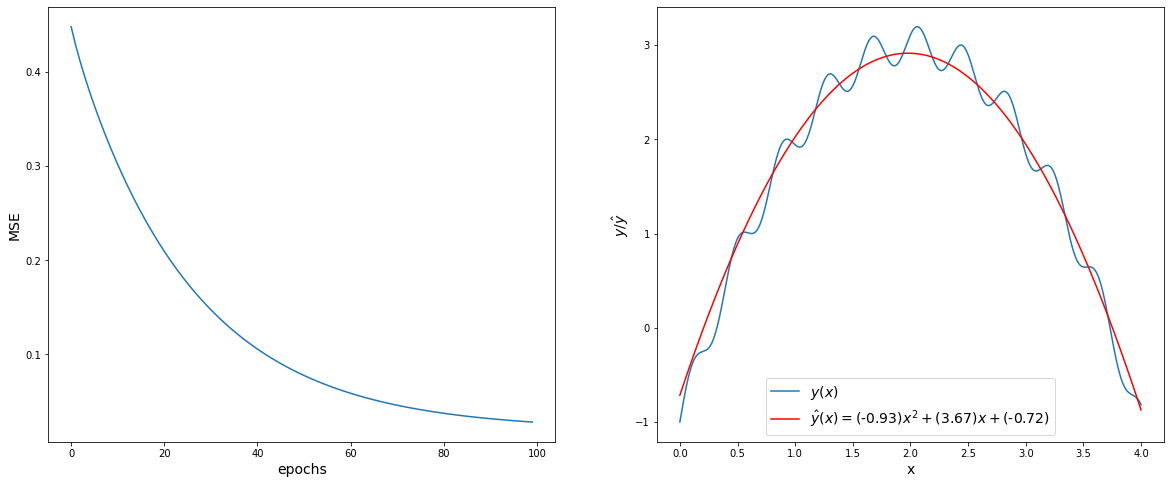

In [12]:
# Se grafica la loss en función de las epochs y el comportamiento del modelo encontrado

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(MSE)
ax.set_xlabel("epochs", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)

ax2.plot(x, y, label = "$y(x)$")
ax2.plot(x, f(x, W), 'r',label = "$\hat{y}(x) = ($" + str(round(W[0],2)) + "$)x^{2} + $(" + str(round(W[1],2)) + ")" + "$x +($" + str(round(W[2],2)) + ")")
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("$y/\hat{y}$", fontsize=14)
ax2.legend(fontsize=14)

plt.show()

#### 3. Mini-Batch Gradient Descent para entrenar un modelo cuadrático
Implementar el ejercicio 2 de la Clase 2 utilizando PyTorch. Pueden tomar de referencia los notebooks vistos durante la clase.

In [13]:
# Hiperparámetros
lr = 0.01

# El batchsize, lr y las epochs son iguales al punto anterior para poder comparar resultados
batchsize = 500
epochs = 100

In [14]:
x = np.linspace(0, 4, 10000)
X = np.column_stack((x**2, x, np.ones(len(x))))
y = -(x - 2)** 2 + 3 + 0.2 * np.sin(16 * x)

Xy = np.column_stack((X, y))
Xy = rng.permutation(Xy)
batches = int(len(Xy)/batchsize)

W = torch.tensor(rng.standard_normal(3), requires_grad = True, dtype = torch.float64)


In [15]:
MSE = np.zeros(epochs)
for epoch in range(epochs):
  for i in range(batches):
    if W.grad is not None:
      W.grad.zero_()
    X_t = torch.tensor(Xy[i*batchsize:(i+1)*batchsize, 0:3])
    y_t = torch.tensor(Xy[i*batchsize:(i+1)*batchsize, 3])
    y_hat = X_t @ W

    L = torch.mean((y_hat - y_t)**2)
    L.backward() 

    with torch.no_grad():
      W -= lr * W.grad

  MSE[epoch] = L

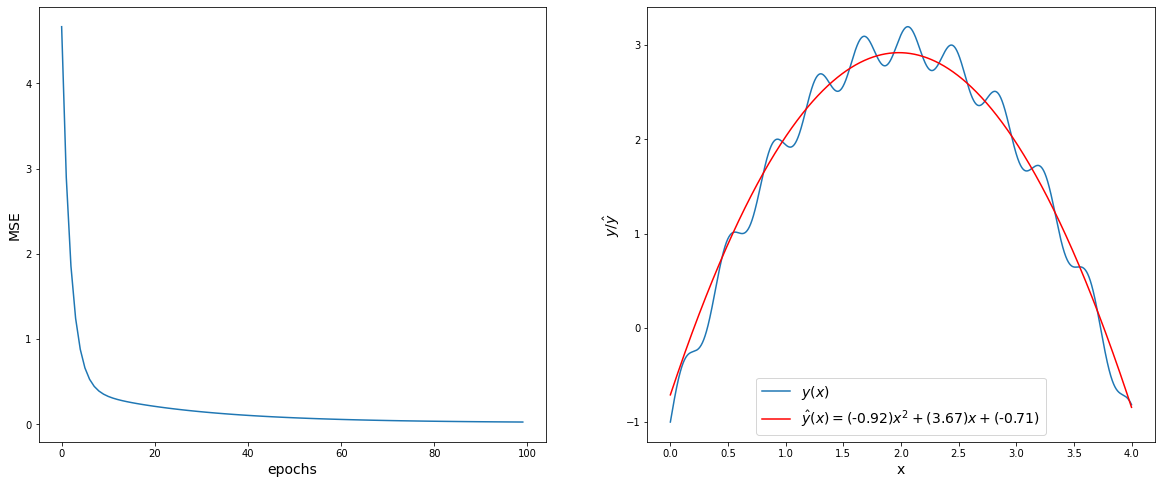

In [17]:
# Se grafica la loss en función de las epochs y el comportamiento del modelo encontrado

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(MSE)
ax.set_xlabel("epochs", fontsize=14)
ax.set_ylabel("MSE", fontsize=14)

W_print = W.detach().numpy()
ax2.plot(x, y, label = "$y(x)$")
ax2.plot(x, X @ W_print, 'r',label = "$\hat{y}(x) = ($" + str(round(W_print[0],2)) + "$)x^{2} + $(" + str(round(W_print[1],2)) + ")" + "$x +($" + str(round(W_print[2],2)) + ")")
ax2.set_xlabel("x", fontsize=14)
ax2.set_ylabel("$y/\hat{y}$", fontsize=14)
ax2.legend(fontsize=14)

plt.show()

Conclusión: se obtienen resultados idénticos si se implementa el modelo "a mano" o mediante Pytorch.